# Dimensionality reduction 

#### Import packages 

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
plt.style.use('seaborn-poster')

In [3]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import scale

#### Load prepared data set 

In [6]:
import data_formatter

data_set = pd.read_csv("prepared_dataset.csv")

nb_events_as_features = 1

X, y = data_formatter.prepare_data_set(data_set, nb_events_as_features)

#### Apply PCA and LDA 
(Huge overlap, which is normal on equity data where we can't expect to have separable data)

explained variance ratio (first two components): [ 0.49889645  0.03694988]
explained variance ratio (first two components), scaled: [ 1.]


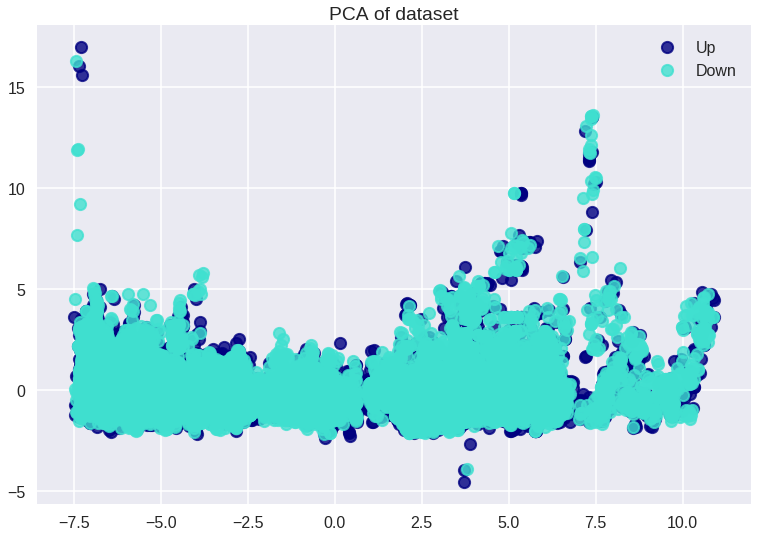

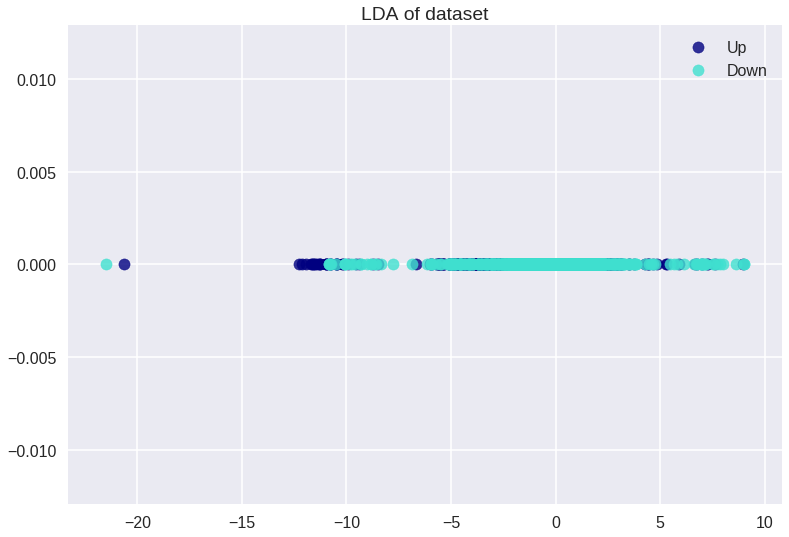

In [27]:
# Scale features to avoid unbalanceness
X_scaled = scale(X)

# PCA 2 components to be able to plot projected samples
pca = PCA(n_components=2)
X_r = pca.fit(X_scaled).transform(X_scaled)

# LDA 2-1=1 direction to find max variance
lda = LinearDiscriminantAnalysis(n_components=1)
X_r2 = lda.fit(X_scaled, y).transform(X_scaled)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

# Percentage of variance explained for each components
print('explained variance ratio (first two components), scaled: %s'
      % str(lda.explained_variance_ratio_))

plt.figure()
target_names = ['Up', 'Down']
colors = ['navy', 'turquoise']
markers = ['o', 'o']
lw = 2

for color, marker, i, target_name in zip(colors, markers, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], 
                X_r[y == i, 1], 
                color=color, 
                marker=marker, 
                alpha=.8, 
                lw=lw,
                label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of dataset')

plt.figure()
for color, marker, j, target_name in zip(colors, markers, [0, 1], target_names):
    plt.scatter(X_r2[y == j, 0], 
                [0]*X_r2[y == j, 0].shape[0], 
                alpha=.8, 
                color=color, 
                marker=marker, 
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of dataset')

plt.show()